In [1]:
import pandas as pd
import numpy as np

from copy import deepcopy
import mplsoccer
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.projections import get_projection_class
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
attEventData = pd.read_csv('data/attEventData.csv')

In [3]:
shotData = attEventData[attEventData['type.id']==16]

In [4]:
carryData = deepcopy(attEventData[(attEventData["type.id"] == 43)
                & (attEventData["startX"] > 80)])

In [5]:
dribbleData = deepcopy(attEventData[(attEventData["type.id"] == 14)
                              & (attEventData["startX"] > 80)]) #dribbles in final 3rd

# Shot Analysis - Barcelona

In [6]:
barcaAttData = shotData[shotData['team.id']==217]

In [7]:
shotData[["shot.outcome.id", "shot.outcome.name"]].drop_duplicates()

shot.outcome.id shot.outcome.name
13               96.0           Blocked
16              100.0             Saved
30               97.0              Goal
38               98.0             Off T
128             101.0           Wayward
202              99.0              Post
2511            115.0  Saved Off Target

In [8]:
barcaAttData.groupby(["player.id"]).agg({"player.name":"first",
                                        "team.name":"first",
                                        "type.id":'count',
                                        "shot.outcome.id":[lambda x: x.isin([97, 100]).sum(),
                                                         lambda x: (x == 97).sum()],
                                     "shot.statsbomb_xg": "sum"})

player.name  team.name type.id  \
                                            first      first   count   
player.id                                                              
4447.0             Martin Braithwaite Christensen  Barcelona      12   
5246.0                   Luis Alberto Suárez Díaz  Barcelona      71   
5477.0                            Ousmane Dembélé  Barcelona       5   
5487.0                          Antoine Griezmann  Barcelona      41   
5503.0             Lionel Andrés Messi Cuccittini  Barcelona     159   
8206.0                  Arturo Erasmo Vidal Pardo  Barcelona       3   
11392.0    Arthur Henrique Ramos de Oliveira Melo  Barcelona       1   
24841.0                         Ricard Puig Martí  Barcelona       1   
25006.0                        Carles Pérez Sayol  Barcelona       1   
30756.0                            Anssumane Fati  Barcelona      23   

          shot.outcome.id            shot.statsbomb_xg  
               <lambda_0> <lambda_1>               sum  
player.id                                               
4447.0                  7          1          2.665911  
5246.0                 38         13         12.680841  
5477.0                  2          1          1.035488  
5487.0                 16          7          6.814204  
5503.0                 68         25         19.486048  
8206.0                  2          1          0.234118  
11392.0                 0          0          0.027199  
24841.0                 1          0          0.059284  
25006.0                 1          0          0.171200  
30756.0                 8          5          2.996818

In [9]:
playerShotsData = barcaAttData.groupby(["player.id"]).agg({"player.name":"first",
                                        "team.name":"first",
                                        "type.id":'count',
                                        "shot.outcome.id":[lambda x: x.isin([97, 100]).sum(),
                                                         lambda x: (x == 97).sum()],
                                     "shot.statsbomb_xg": "sum"})

In [10]:
playerShotsData.to_csv('data/playerShotsData.csv')

In [11]:
playerShotsData.columns = ["player.name", 'team.name', "totShots", "shotsOT", "Goals", "xG"]

In [12]:
playerMatchMindf = \
    barcaAttData.drop_duplicates(subset=['player.id',"match_id"]).groupby('player.id')\
    .agg({'minsPlayed':'sum'})

In [13]:
playerShotsData = pd.concat([playerShotsData,playerMatchMindf],axis=1)

In [14]:
playerShotsData

player.name  team.name  totShots  \
player.id                                                                
4447.0             Martin Braithwaite Christensen  Barcelona        12   
5246.0                   Luis Alberto Suárez Díaz  Barcelona        71   
5477.0                            Ousmane Dembélé  Barcelona         5   
5487.0                          Antoine Griezmann  Barcelona        41   
5503.0             Lionel Andrés Messi Cuccittini  Barcelona       159   
8206.0                  Arturo Erasmo Vidal Pardo  Barcelona         3   
11392.0    Arthur Henrique Ramos de Oliveira Melo  Barcelona         1   
24841.0                         Ricard Puig Martí  Barcelona         1   
25006.0                        Carles Pérez Sayol  Barcelona         1   
30756.0                            Anssumane Fati  Barcelona        23   

           shotsOT  Goals         xG  minsPlayed  
player.id                                         
4447.0           7      1   2.665911       294.0  
5246.0          38     13  12.680841      1797.0  
5477.0           2      1   1.035488       225.0  
5487.0          16      7   6.814204      1839.0  
5503.0          68     25  19.486048      2968.0  
8206.0           2      1   0.234118       184.0  
11392.0          0      0   0.027199        37.0  
24841.0          1      0   0.059284        92.0  
25006.0          1      0   0.171200         8.0  
30756.0          8      5   2.996818       616.0

In [15]:
playerShotsData['shotsPer90'] = playerShotsData['totShots'].divide(playerShotsData['minsPlayed'])*90

In [16]:
playerShotsData['shotAccuracy'] = playerShotsData['shotsOT'].divide(playerShotsData['totShots'])

In [17]:
playerShotsDataFiltered = playerShotsData[playerShotsData['totShots'] >= 5]

In [18]:
playerShotsDataFiltered

player.name  team.name  totShots  shotsOT  \
player.id                                                                 
4447.0     Martin Braithwaite Christensen  Barcelona        12        7   
5246.0           Luis Alberto Suárez Díaz  Barcelona        71       38   
5477.0                    Ousmane Dembélé  Barcelona         5        2   
5487.0                  Antoine Griezmann  Barcelona        41       16   
5503.0     Lionel Andrés Messi Cuccittini  Barcelona       159       68   
30756.0                    Anssumane Fati  Barcelona        23        8   

           Goals         xG  minsPlayed  shotsPer90  shotAccuracy  
player.id                                                          
4447.0         1   2.665911       294.0    3.673469      0.583333  
5246.0        13  12.680841      1797.0    3.555927      0.535211  
5477.0         1   1.035488       225.0    2.000000      0.400000  
5487.0         7   6.814204      1839.0    2.006525      0.390244  
5503.0        25  19.486048      2968.0    4.821429      0.427673  
30756.0        5   2.996818       616.0    3.360390      0.347826

# Analysing Shot Maps 

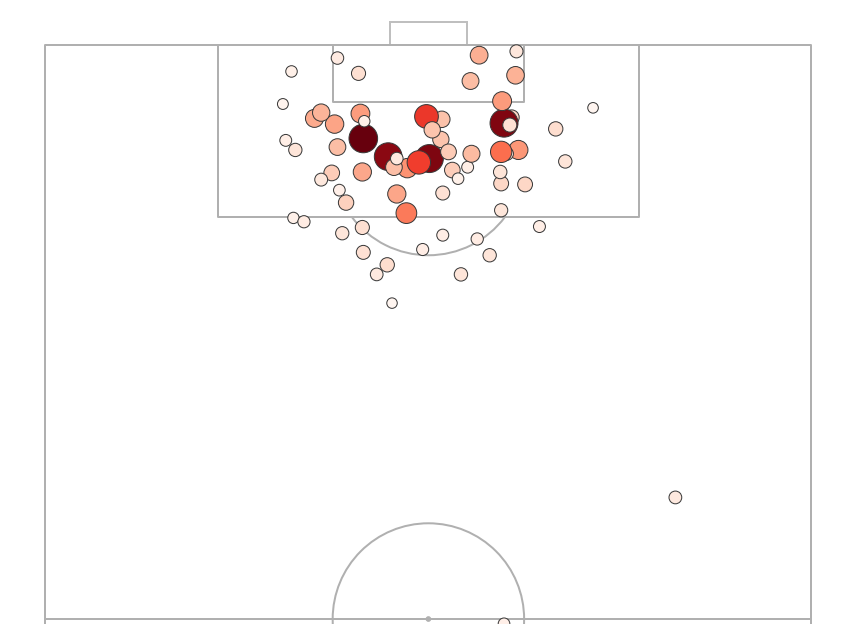

In [19]:
playerID = 5246
playerData = barcaAttData[barcaAttData['player.id'] == playerID]
pitch = mplsoccer.VerticalPitch(pad_bottom=0.5,
                               half=True,
                                goal_type = 'box',
                                goal_alpha=0.8)
fig, ax = pitch.draw(figsize=(12,10))
sc = pitch.scatter(playerData["startX"],playerData["startY"],
                s=(playerData["shot.statsbomb_xg"]*900)+100,
                c = playerData['shot.statsbomb_xg'].values.flatten(),
                  edgecolors='#383838',
                  cmap = "Reds",
                  marker="o",
                  ax=ax)

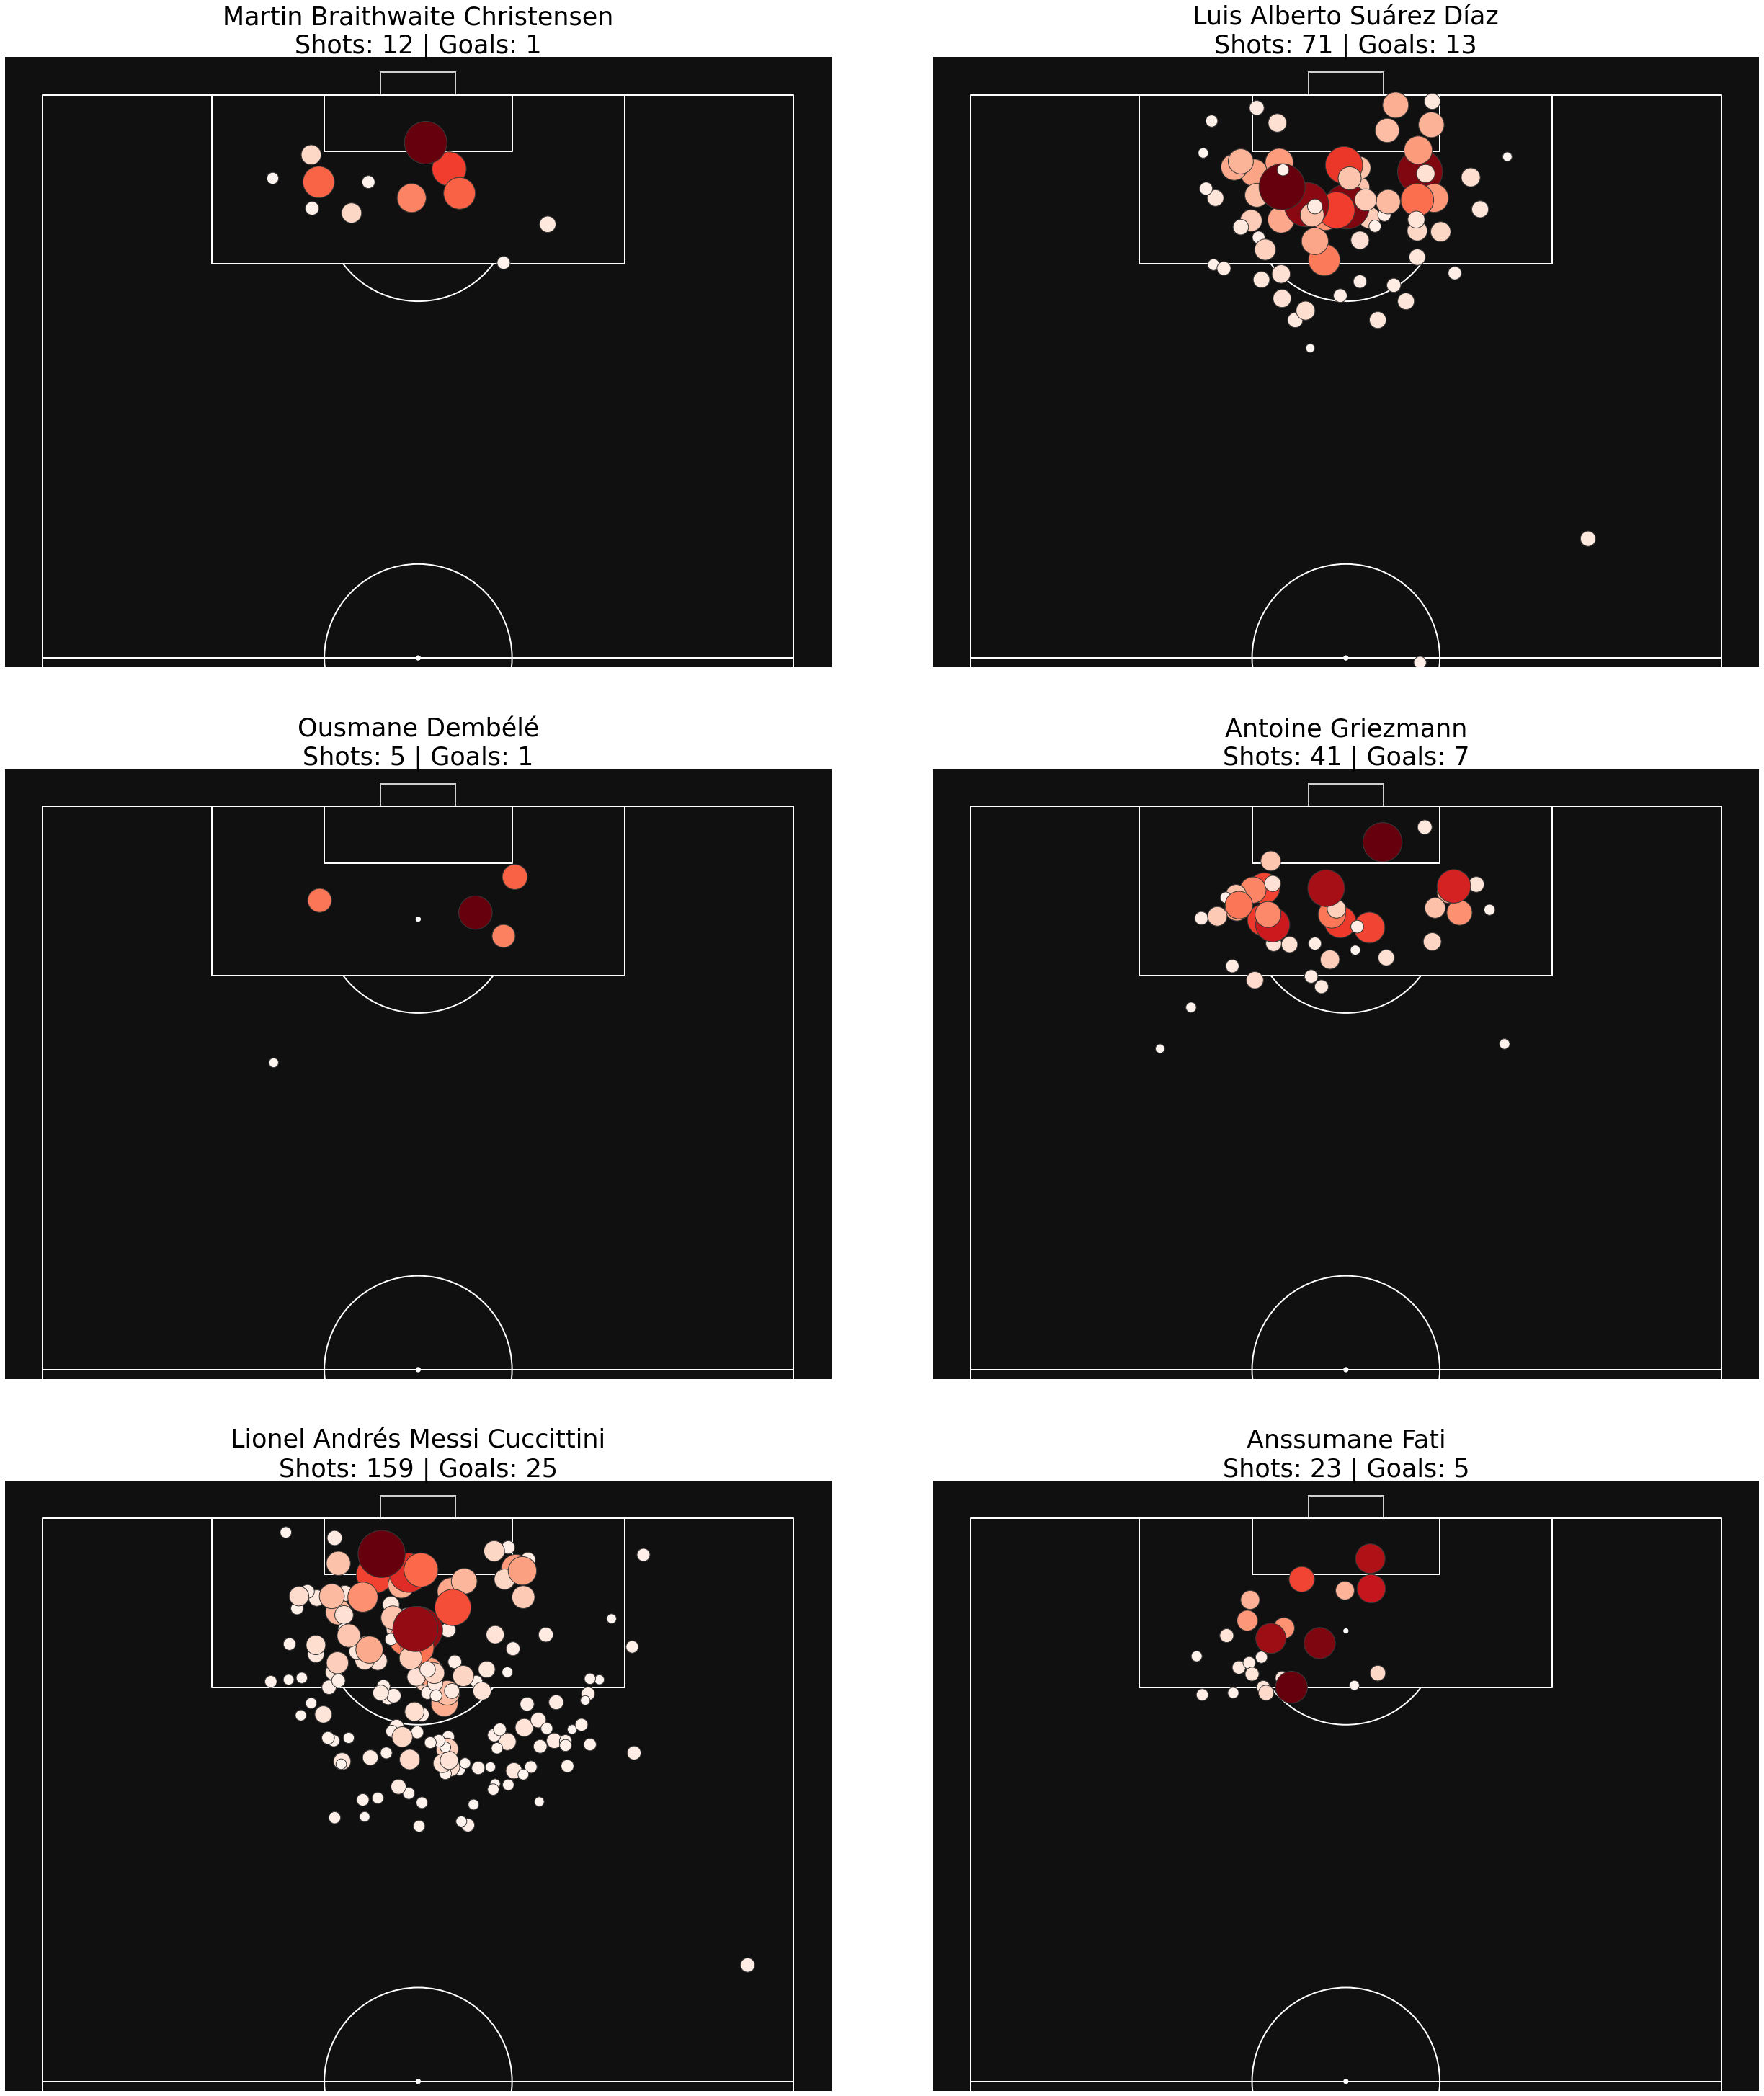

In [20]:
pitch = mplsoccer.VerticalPitch(pitch_color="#101010",
                                line_color="white",
                                pad_bottom=1,  # pitch extends slightly below halfway line
                                half=True,  # half of a pitch
                                goal_type='box',
                                goal_alpha=0.8)  # control the goal transparency
fig, axs = pitch.grid(nrows=3, ncols=2, space=0.1, figheight=40,
                      title_height=0, endnote_height=0,  # no title/ endnote
                      grid_width=0.9, grid_height=0.98, bottom=0.01, left=0.05)

playerIDs = playerShotsDataFiltered.index
for idx, ax in enumerate(axs['pitch'].flat):
    playerData = barcaAttData[barcaAttData["player.id"] == playerIDs[idx]]
    sc = pitch.scatter(playerData["startX"],playerData["startY"],
                      s=(playerData["shot.statsbomb_xg"]*5000)+100,
                      c = playerData["shot.statsbomb_xg"].values.flatten(),
                       edgecolors='#383838',  # give the markers a charcoal border
                       marker="o",
                       cmap="Reds",
                       ax=ax
                      )
    ax.set_title(playerData["player.name"].unique().item() + "\nShots: " + str(len(playerData))
                 + " | Goals: " + str(playerShotsData.loc[playerIDs[idx], "Goals"].sum().item()),
                 fontsize=35)

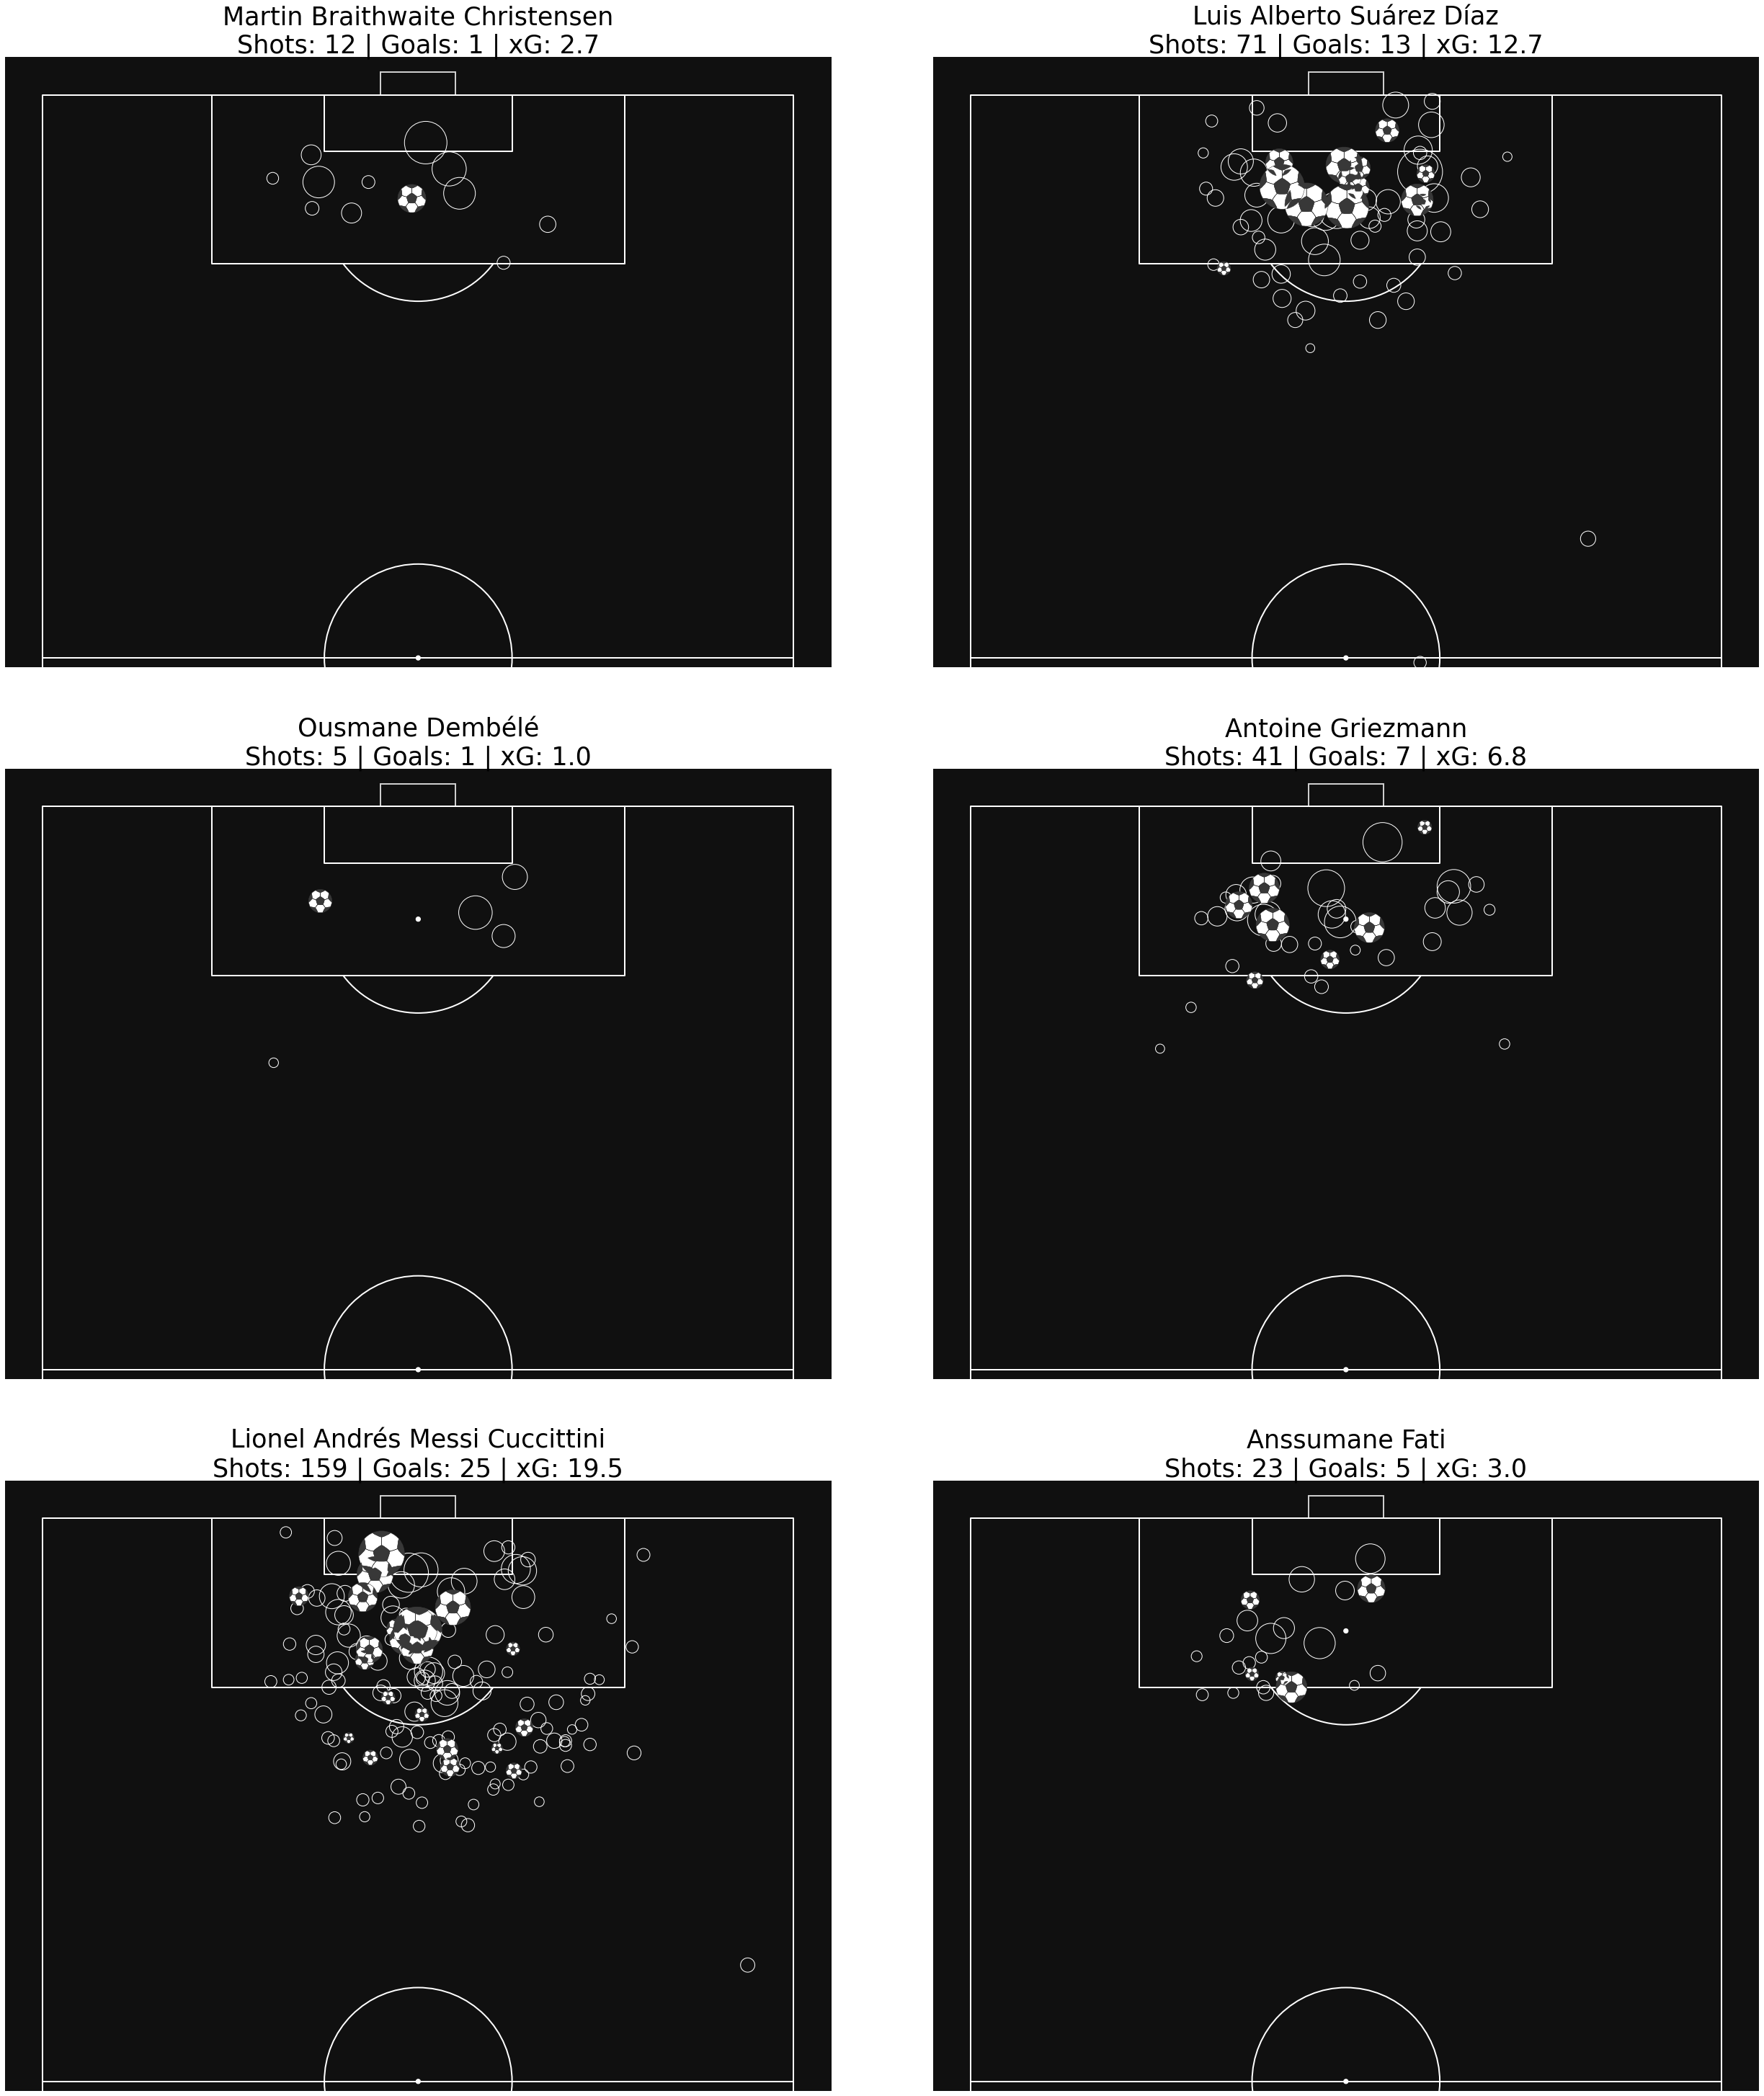

In [21]:
pitch = mplsoccer.VerticalPitch(pitch_color="#101010",
                                line_color="white",
                                pad_bottom=1,  # pitch extends slightly below halfway line
                                half=True,  # half of a pitch
                                goal_type='box',
                                goal_alpha=0.8)  # control the goal transparency
fig, axs = pitch.grid(nrows=3, ncols=2, space=0.1, figheight=40,
                      title_height=0, endnote_height=0,  # no title/ endnote
                      grid_width=0.9, grid_height=0.98, bottom=0.01, left=0.05)

playerIDs = playerShotsDataFiltered.index
for idx, ax in enumerate(axs['pitch'].flat):
    playerData = barcaAttData[barcaAttData["player.id"] == playerIDs[idx]]
    ngplayerData = playerData[playerData["shot.outcome.id"] != 97]
    gplayerData = playerData[playerData["shot.outcome.id"] == 97]
    
    sc = pitch.scatter(ngplayerData["startX"],ngplayerData["startY"],
                       s = (ngplayerData["shot.statsbomb_xg"]*5000)+100,
                       c="None"
                       ,edgecolors='#ffffff',  # give the markers a charcoal border
                       marker="o",
                       ax=ax)
    
    sc = pitch.scatter(gplayerData["startX"],gplayerData["startY"],
                       s = (gplayerData["shot.statsbomb_xg"]*5000)+100,
                       c="white"
                       ,edgecolors='#383838',  # give the markers a charcoal border
                       marker="football",
                       ax=ax)
    totGoals = playerShotsData.loc[playerIDs[idx],"Goals"].sum().item()
    totxG = playerShotsData.loc[playerIDs[idx],"xG"].sum().round(1).item()
    ax.set_title(playerData["player.name"].unique().item() + "\nShots: " + str(len(playerData))
                 + " | Goals: " + str(totGoals)+ " | xG: " + str(totxG),
                 fontsize=35)

In [22]:
fig = px.scatter(x="xG", y="Goals",
                 data_frame=playerShotsData,
                 text="player.name", size="xG",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[0, playerShotsData[["Goals", "xG"]].max().max()],
                         y=[0, playerShotsData[["Goals", "xG"]].max().max()]))

fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=600, width=1000)
fig.show()

# Carry Analysis



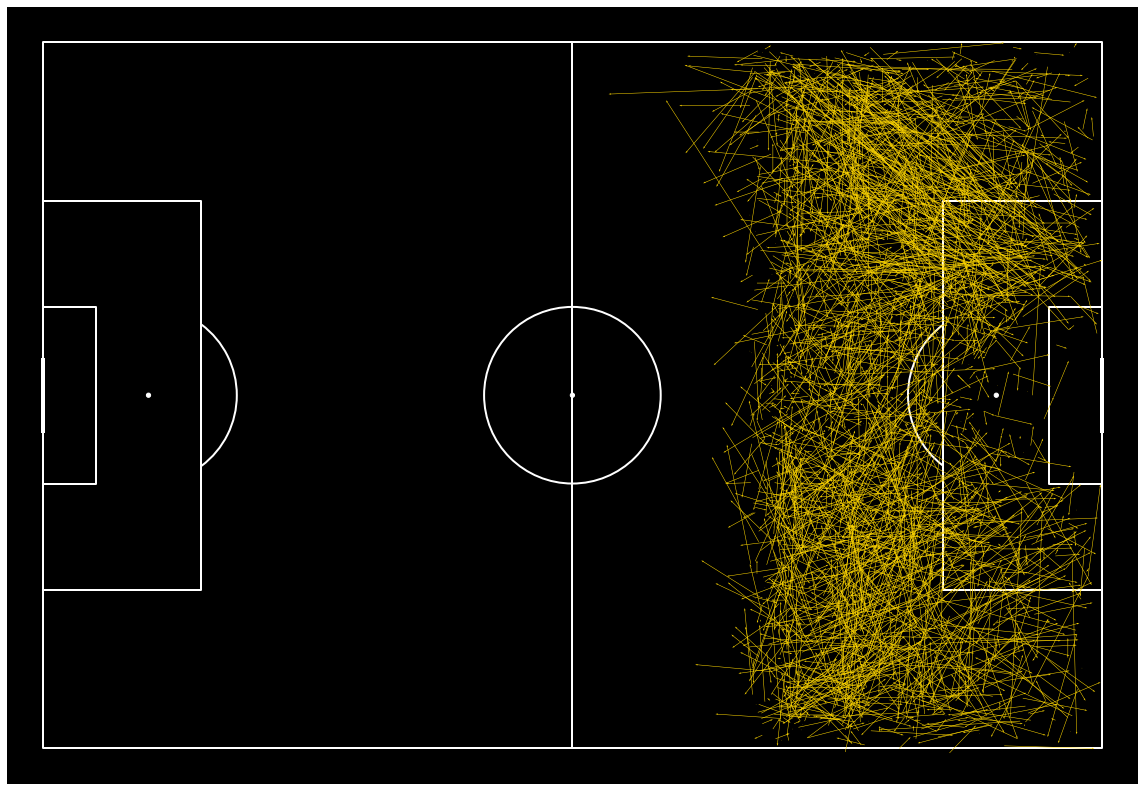

In [23]:
pitch = mplsoccer.Pitch(pitch_color='black',line_color='white')
fig,ax = pitch.draw(figsize=(16,18))
arrows = pitch.arrows(carryData["startX"], carryData["startY"],
                      carryData["endXCarry"], carryData["endYCarry"],
                      ax=ax,
                      width=.5,
                      color="gold")

In [24]:
playerShotsData.shape

(10, 9)

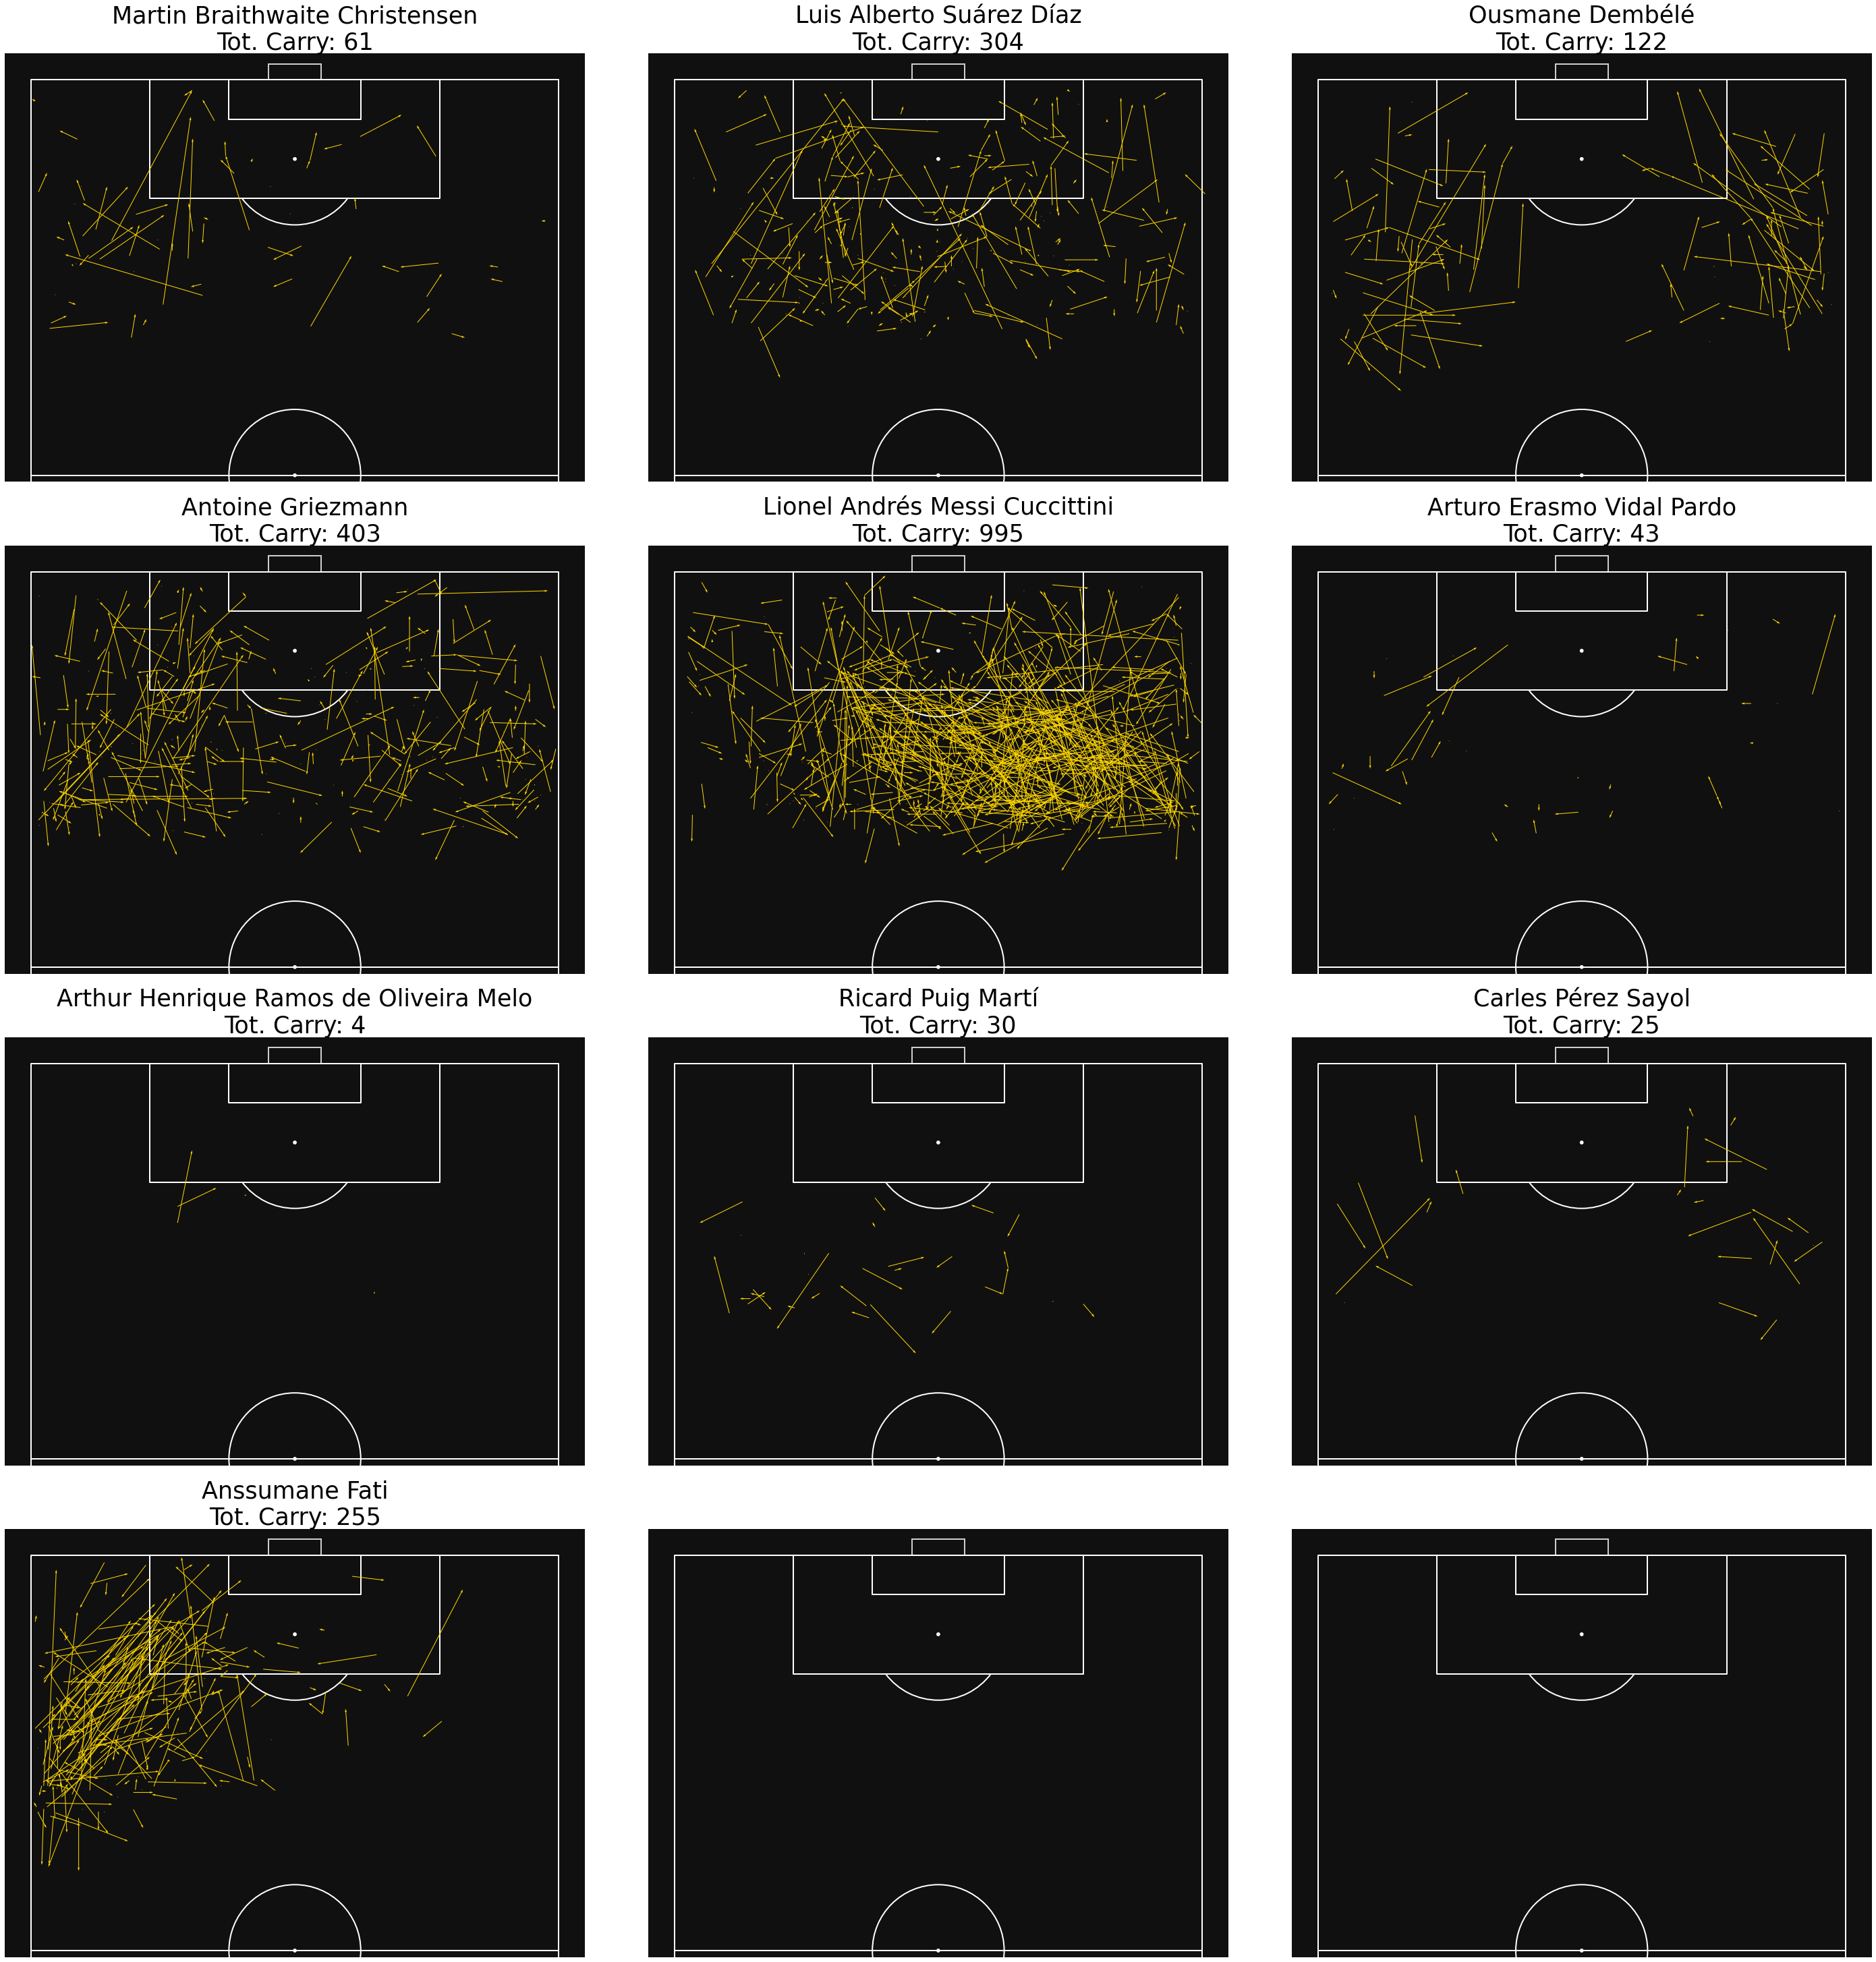

In [25]:
pitch = mplsoccer.VerticalPitch(pitch_color="#101010",
                                line_color="white",
                                pad_bottom=1,  # pitch extends slightly below halfway line
                                half=True,  # half of a pitch
                                goal_type='box',
                                goal_alpha=0.8)  # control the goal transparency
fig, axs = pitch.grid(nrows=4, ncols=3, space=0.1, figheight=40,
                      title_height=0, endnote_height=0,  # no title/ endnote
                      grid_width=0.9, grid_height=0.98, bottom=0.01, left=0.05)
playerIDs = playerShotsData.index
for idx, ax in enumerate(axs['pitch'].flat):
    if idx < len(playerIDs):
        playerData = carryData[carryData["player.id"] == playerIDs[idx]]
        arrows = pitch.arrows(playerData["startX"], playerData["startY"],
                              playerData["endXCarry"], playerData["endYCarry"],
                              ax=ax,
                              width=1,
                              color="gold")
        ax.set_title(playerData["player.name"].unique().item() + "\nTot. Carry: " + str(len(playerData)),
                     fontsize=35)


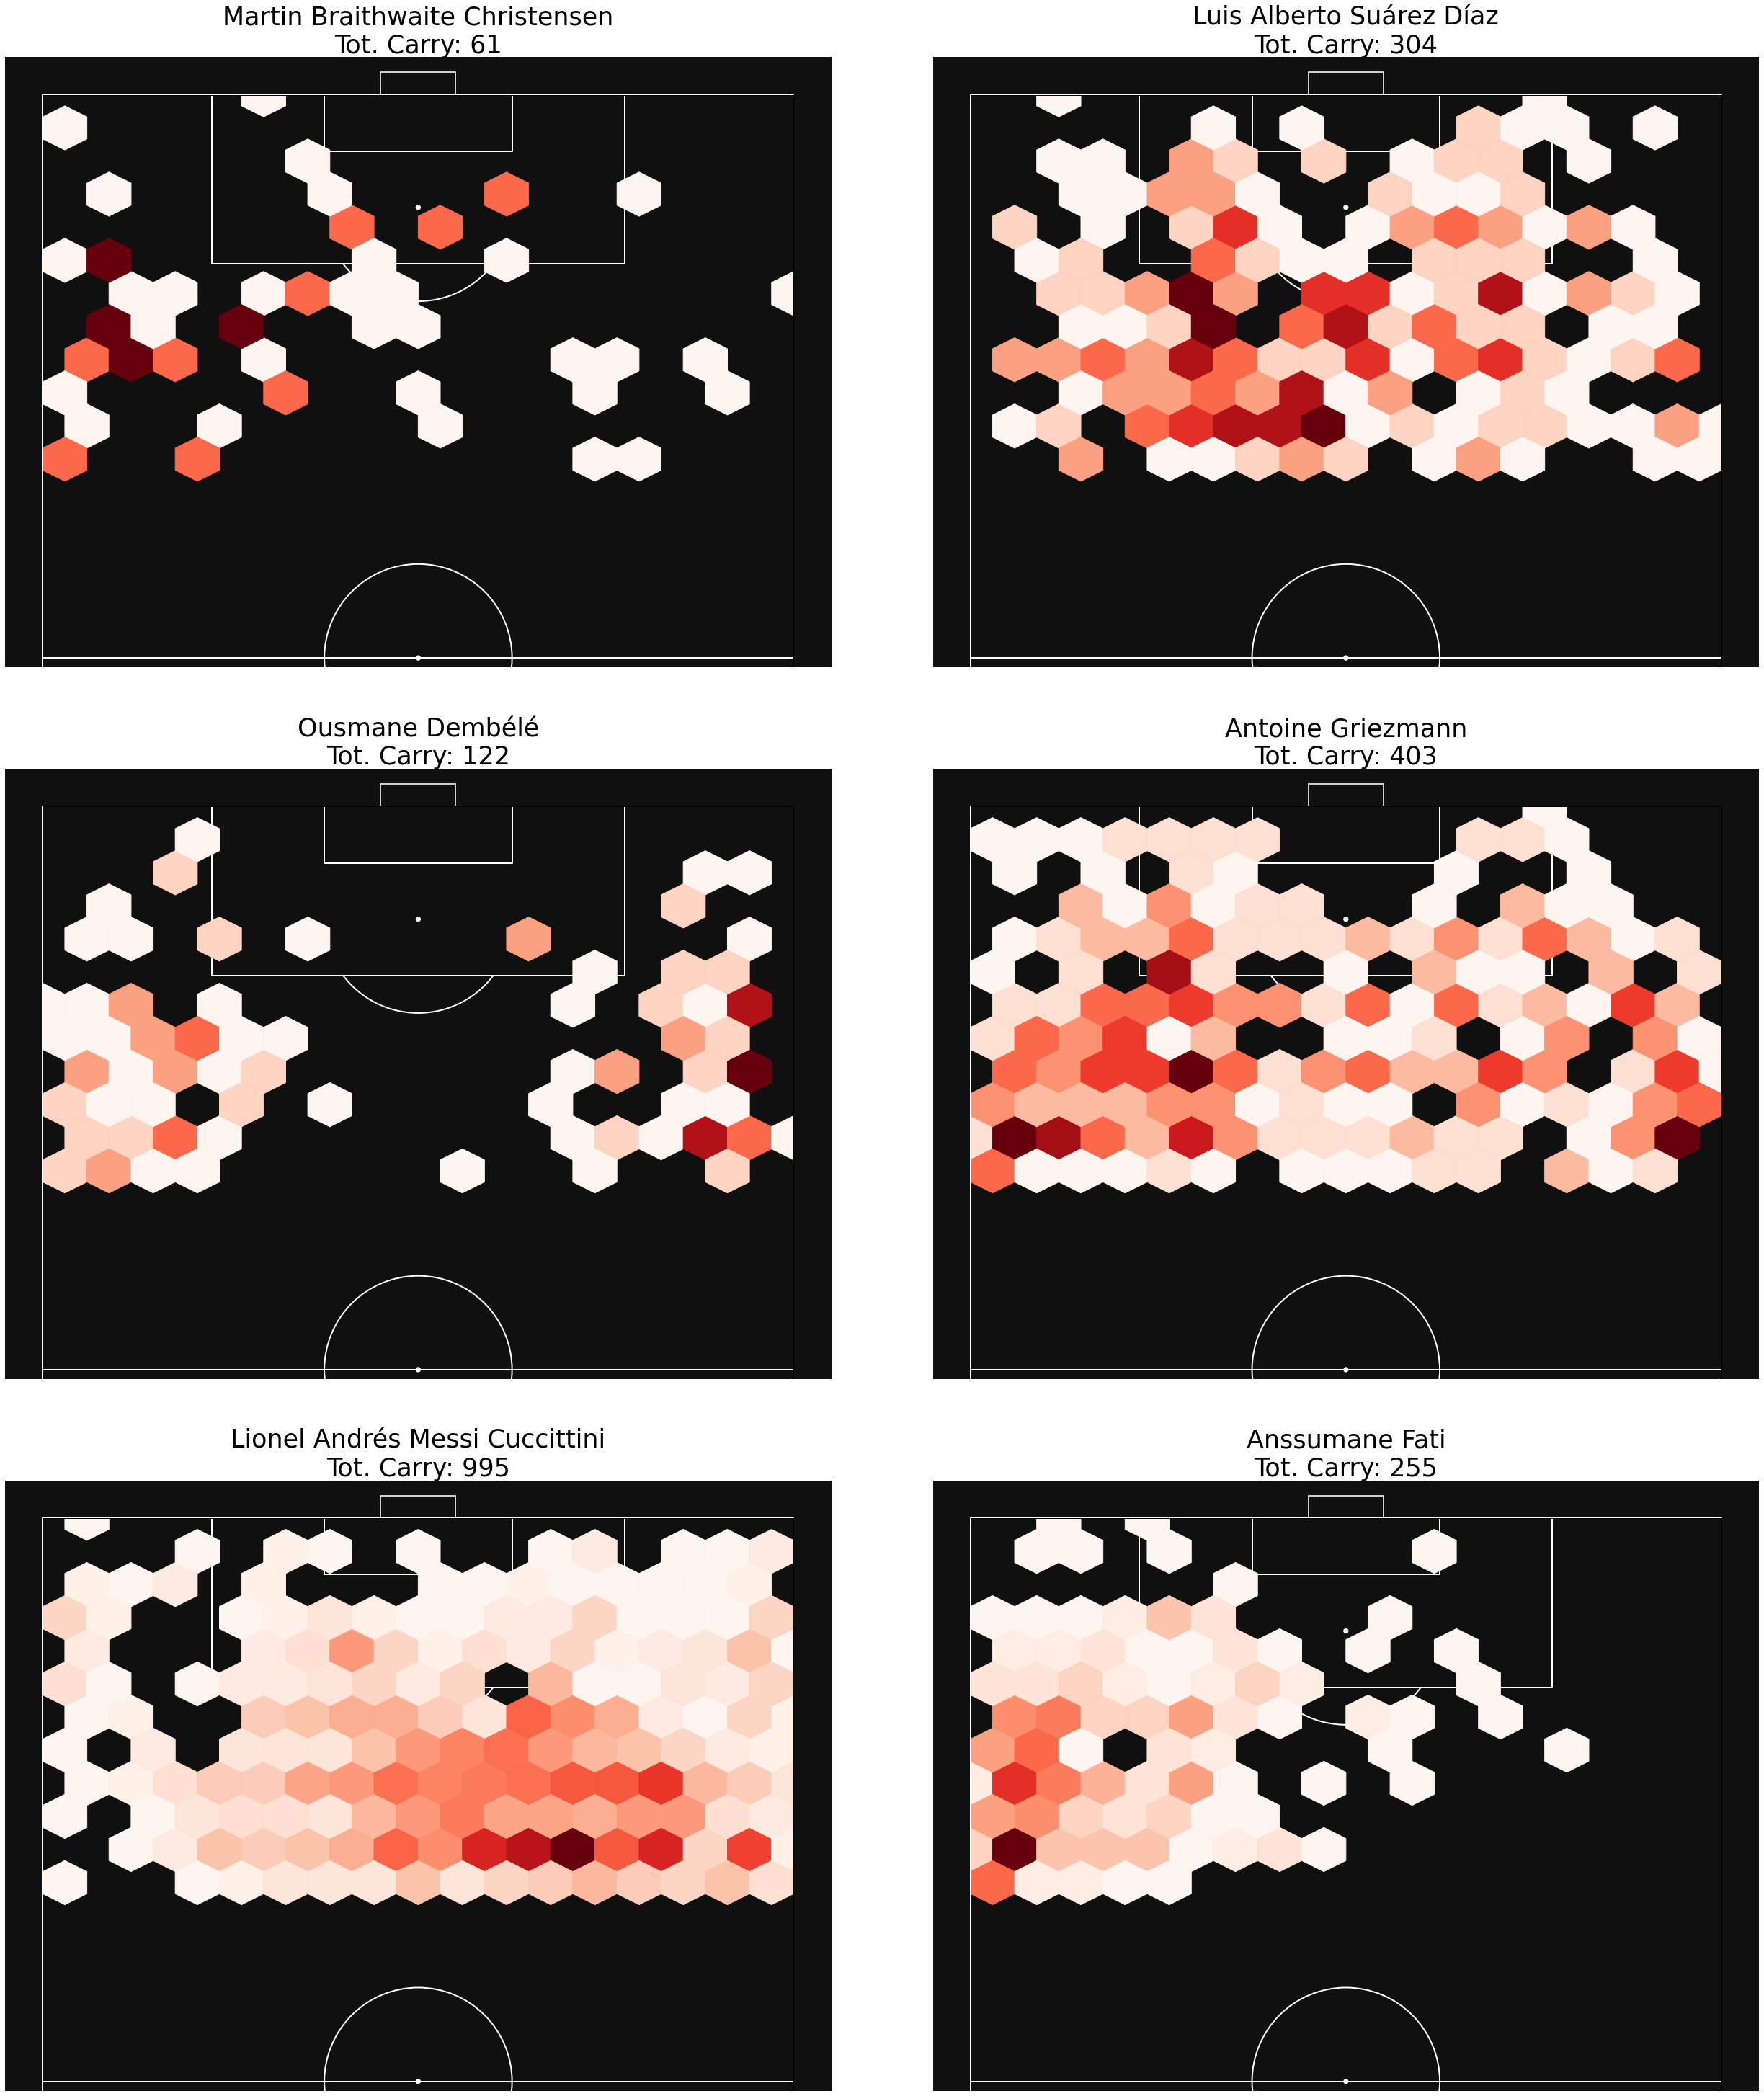

In [26]:
pitch = mplsoccer.VerticalPitch(pitch_color="#101010",
                                line_color="white",
                                pad_bottom=1,  # pitch extends slightly below halfway line
                                half=True,  # half of a pitch
                                goal_type='box',
                                goal_alpha=0.8)  # control the goal transparency
fig, axs = pitch.grid(nrows=3, ncols=2, space=0.1, figheight=40,
                      title_height=0, endnote_height=0,  # no title/ endnote
                      grid_width=0.9, grid_height=0.98, bottom=0.01, left=0.05)
playerIDs = playerShotsDataFiltered.index
for idx, ax in enumerate(axs['pitch'].flat):
    if idx < len(playerIDs):
        playerData = carryData[carryData["player.id"] == playerIDs[idx]]
        arrows = pitch.hexbin(playerData["startX"], playerData["startY"],
                              ax=ax,
                              cmap="Reds")
        ax.set_title(playerData["player.name"].unique().item() + "\nTot. Carry: " + str(len(playerData)),
                     fontsize=35)

# Dribble Analysis

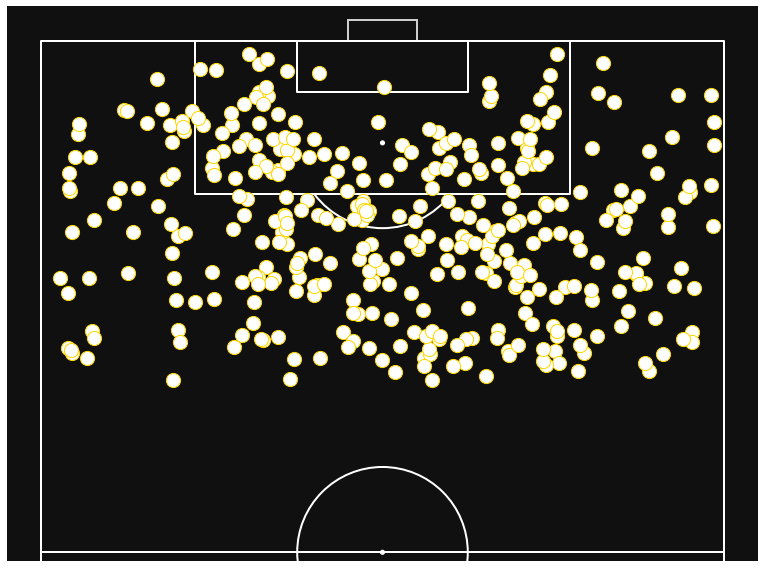

In [27]:
pitch = mplsoccer.VerticalPitch(pitch_color="#101010",
                                line_color="white",
                                pad_bottom=1,  # pitch extends slightly below halfway line
                                half=True,  # half of a pitch
                                goal_type='box',
                                goal_alpha=0.8)  # control the goal transparency

fig, ax = pitch.draw(figsize=(16, 8))

sc = pitch.scatter(dribbleData["startX"], dribbleData["startY"],
                   s=200,
                   c="white",
                   edgecolors='gold',  # give the markers a gold border
                   marker="o",
                   ax=ax)

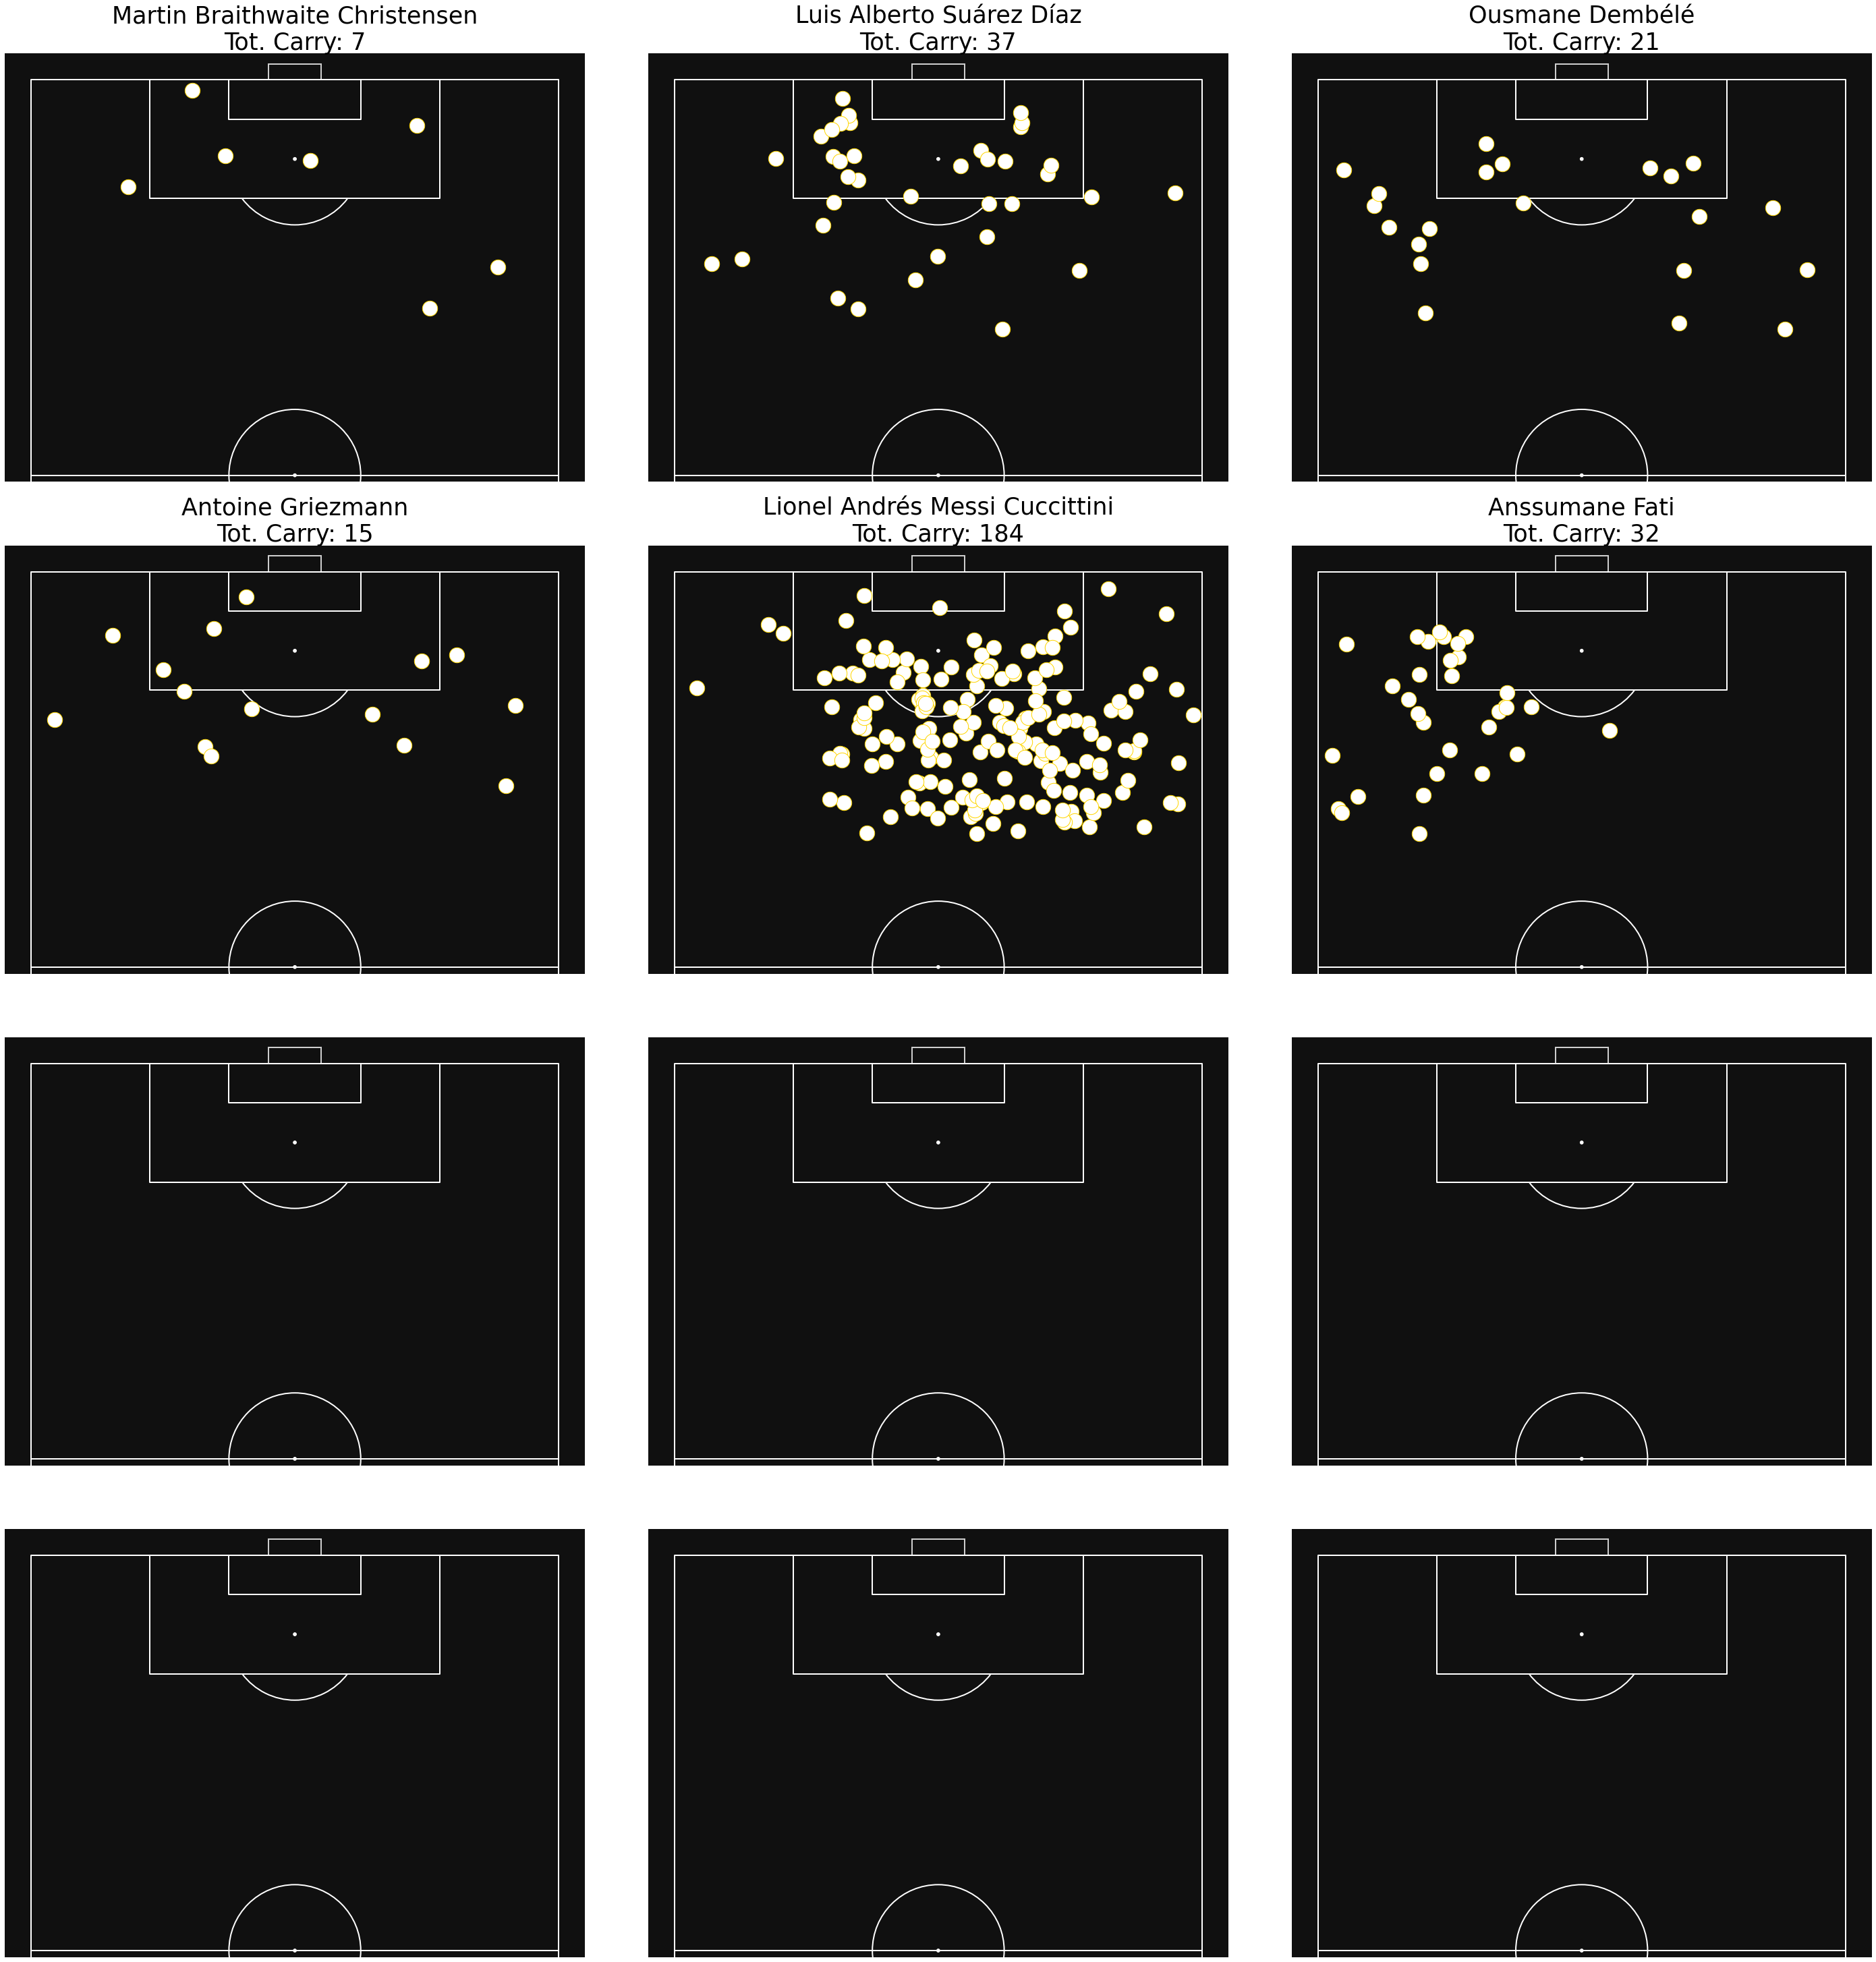

In [28]:
pitch = mplsoccer.VerticalPitch(pitch_color="#101010",
                                line_color="white",
                                pad_bottom=1,  # pitch extends slightly below halfway line
                                half=True,  # half of a pitch
                                goal_type='box',
                                goal_alpha=0.8)  # control the goal transparency
fig, axs = pitch.grid(nrows=4, ncols=3, space=0.1, figheight=40,
                      title_height=0, endnote_height=0,  # no title/ endnote
                      grid_width=0.9, grid_height=0.98, bottom=0.01, left=0.05)
playerIDs = playerShotsDataFiltered.index
for idx, ax in enumerate(axs['pitch'].flat):
    if idx < len(playerIDs):
        playerData = dribbleData[dribbleData["player.id"] == playerIDs[idx]]
        arrows = pitch.scatter(playerData["startX"], playerData["startY"],
                           s=500,
                           c="white",
                           edgecolors='gold',  # give the markers a gold border
                           marker="o",
                           ax=ax)
        try:
            player_name = playerData["player.name"].unique().item()
        
            ax.set_title(player_name + "\nTot. Carry: " + str(len(playerData)),
                     fontsize=35)
        except ValueError :
            pass
            


In [29]:
dribbleData[["dribble.outcome.id","dribble.outcome.name"]].drop_duplicates()

dribble.outcome.id dribble.outcome.name
3                 9.0           Incomplete
8                 8.0             Complete

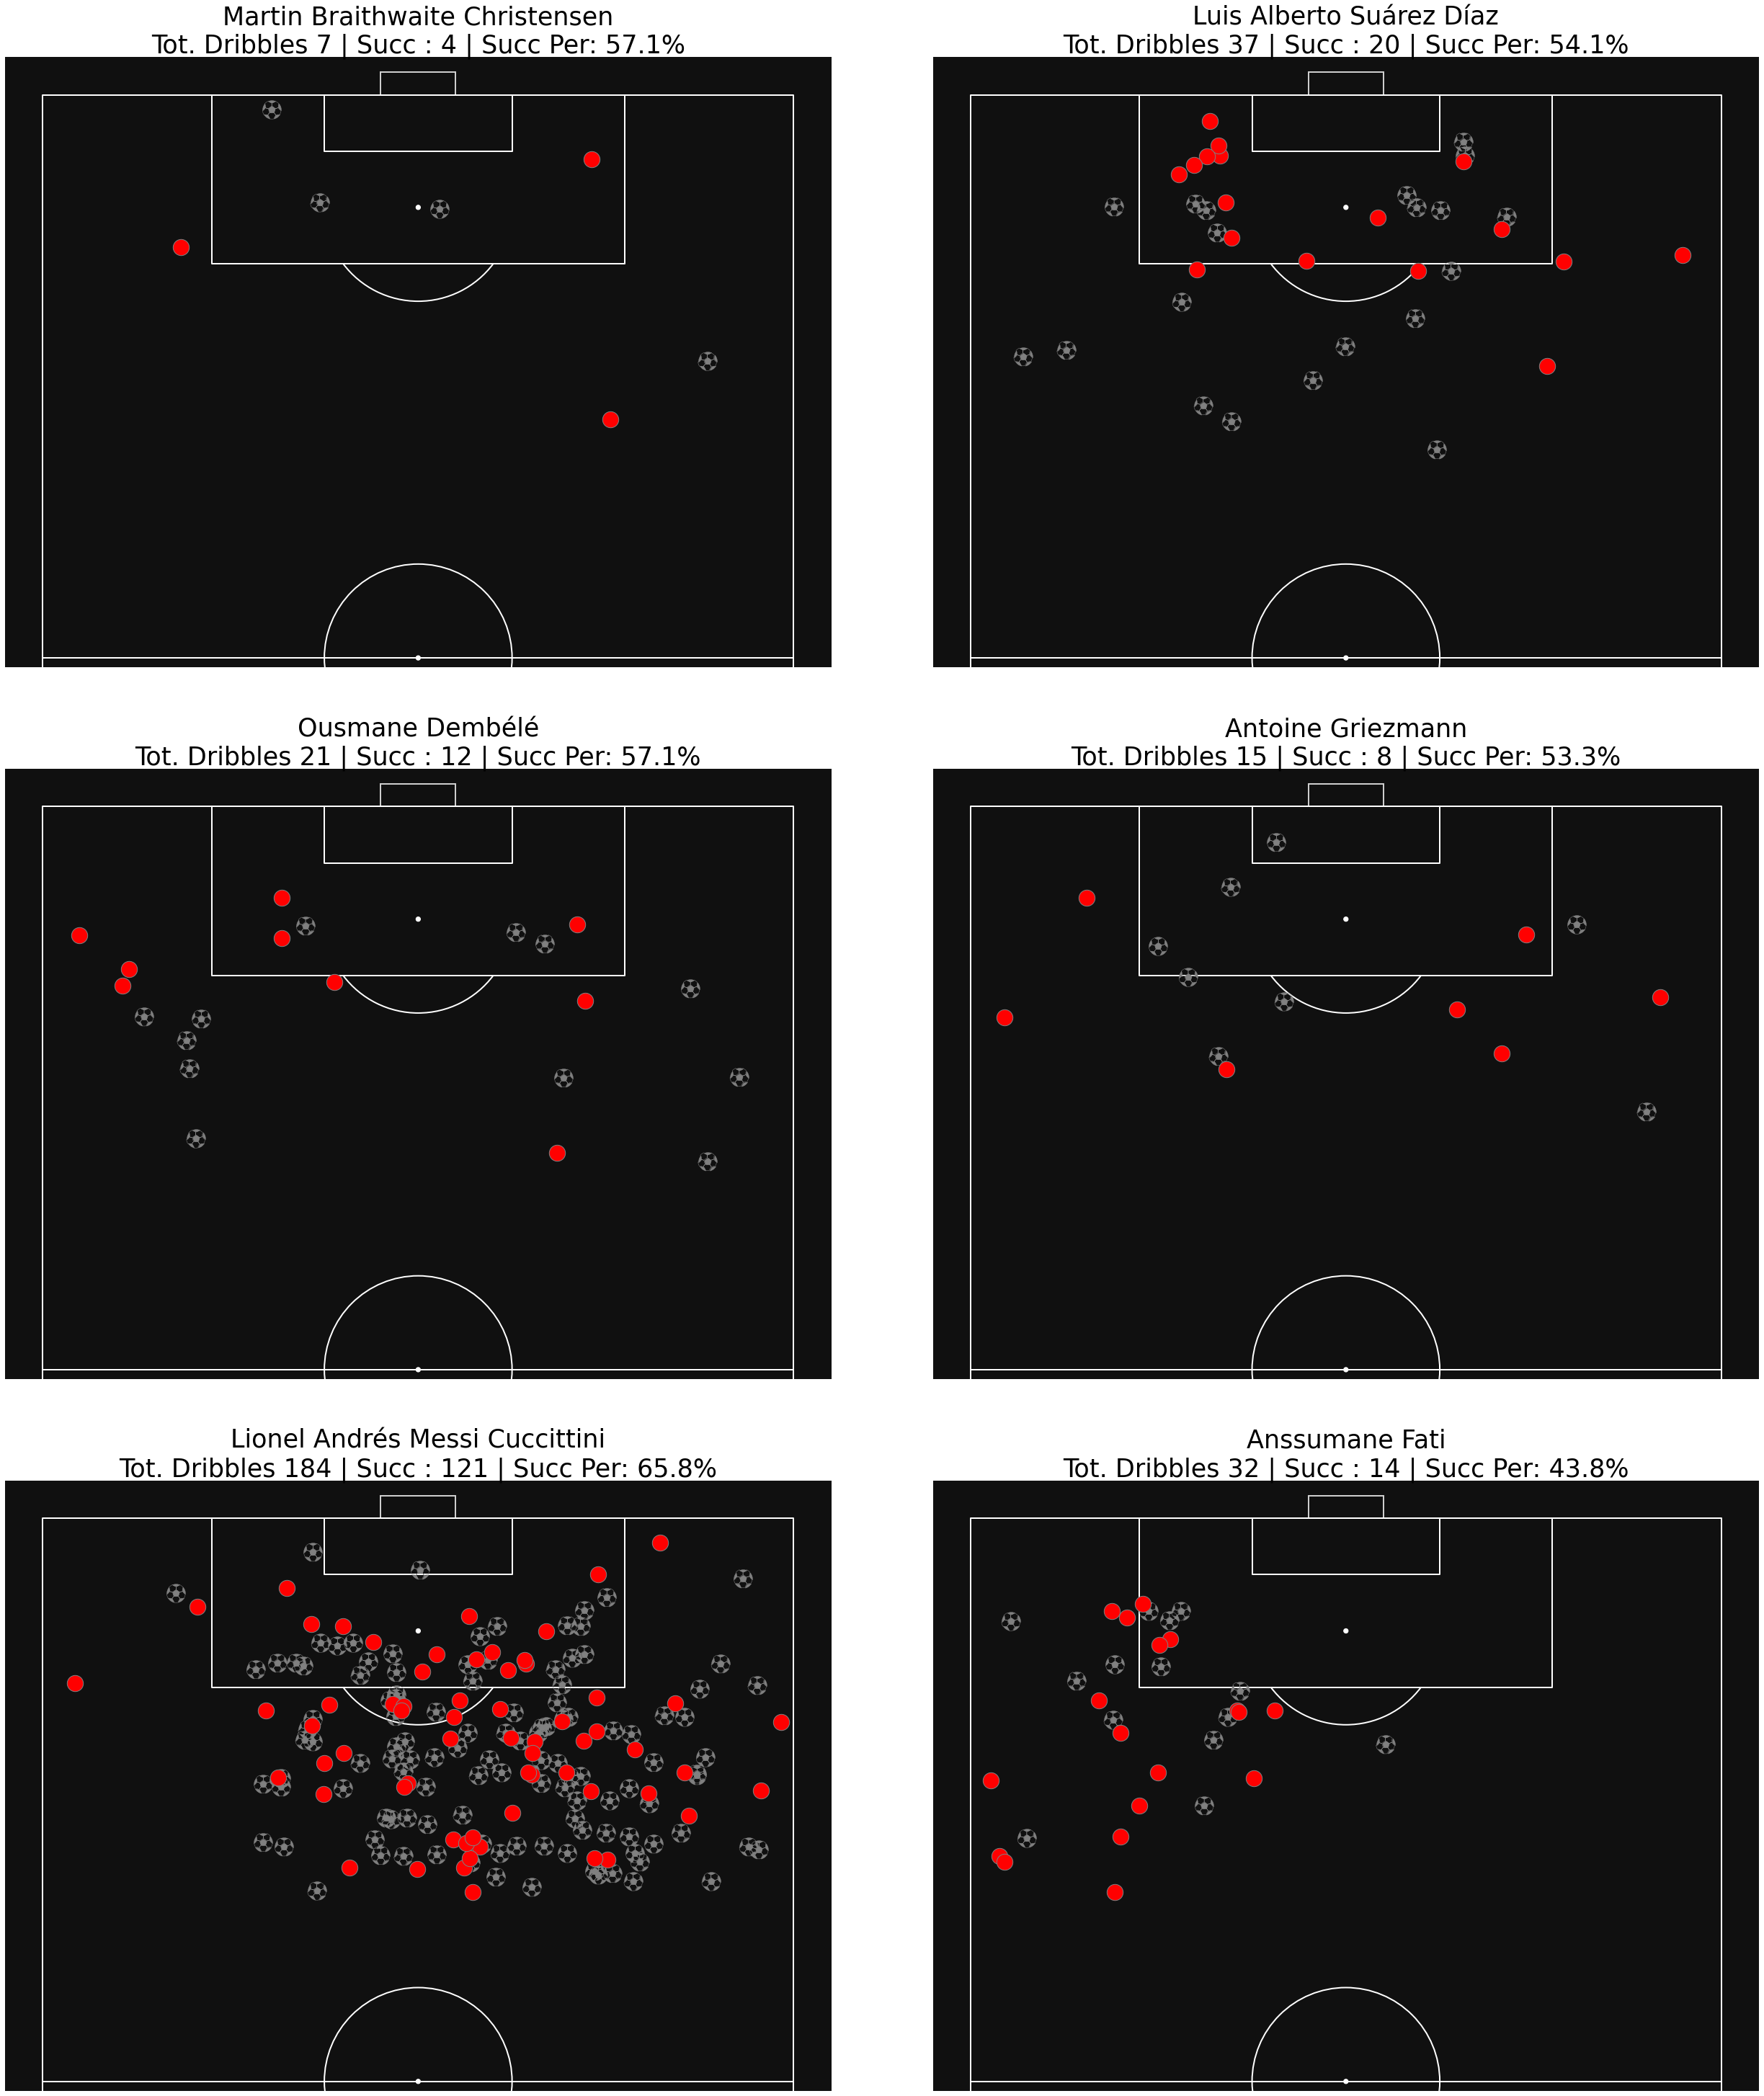

In [31]:
pitch = mplsoccer.VerticalPitch(pitch_color="#101010",
                                line_color="white",
                                pad_bottom=1,  # pitch extends slightly below halfway line
                                half=True,  # half of a pitch
                                goal_type='box',
                                goal_alpha=0.8)  # control the goal transparency
fig, axs = pitch.grid(nrows=3, ncols=2, space=0.1, figheight=40,
                      title_height=0, endnote_height=0,  # no title/ endnote
                      grid_width=0.9, grid_height=0.98, bottom=0.01, left=0.05)
playerIDs = playerShotsDataFiltered.index
for idx, ax in enumerate(axs['pitch'].flatten()):
    if idx < len(playerData):
        playerData = dribbleData[dribbleData['player.id'] == playerIDs[idx]]
        succplayerData = playerData[playerData["dribble.outcome.id"] == 8]
        unsuccplayerData = playerData[playerData["dribble.outcome.id"] == 9]
        sc = pitch.scatter(succplayerData["startX"], succplayerData["startY"],
                           s=700,
                           c="None",
                           edgecolors='grey',  # give the markers a grey border
                           marker="football",
                           ax=ax)
        sc2 = pitch.scatter(unsuccplayerData["startX"], unsuccplayerData["startY"],
                           s=500,
                           c="red",
                           edgecolors='grey',  # give the markers a grey border
                           marker="o",
                           ax=ax
                           )
        totDrib = len(playerData)
        succDrib = len(succplayerData)
        succDribper = round(succDrib/totDrib*100,1)
        
        
        ax.set_title(playerData["player.name"].unique().item() + "\nTot. Dribbles "+ str(totDrib)
                     +" | Succ : " + str(succDrib)+" | Succ Per: " + str(succDribper) + "%",
                     fontsize=35)
